# Softmax Regression via Gradient Descent 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from data import read_data_sets
from nn import Softmax
from tools import train


def experiment(regularization='L1', lam=1e-1,
               initial_rate=1e-5, T=500,
               epoch_min=500, epoch_max=None, early_stopping=3):
    print(regularization, lam)
    print(initial_rate, T)
    print(epoch_min, epoch_max, early_stopping)

    # Annealing
    def rate(t):
        return initial_rate / (1 + t / T)
    
    # Train
    dss = read_data_sets(one_hot=True)
    print('Training set size:', dss.train.size)
    print('Hold-out set size:', dss.validation.size)
    print('Test set size:', dss.test.size)
    results = train(Softmax, dss, rate=rate,
                    lam=lam, regularization=regularization,
                    epoch_min=epoch_min, epoch_max=epoch_max,
                    early_stopping=early_stopping)
    print('Final accuracy:', results.records['c_test'][results.epoch_final])
    
    # Plot    
    results.plot_loss_function()
    plt.savefig('figs/softmax_E.pdf')
    plt.ylim(0, 2)
    plt.savefig('figs/softmax_E_zoom.pdf')
    plt.plot()
    
    results.plot_percent_correct()
    plt.savefig('figs/softmax_c.pdf')
    plt.ylim(0.8, 1)
    plt.savefig('figs/softmax_c_zoom.pdf')
    plt.plot()
    
    return results

L1 0.1
1e-05 500
500 None 3
Training set size: 18000
Hold-out set size: 2000
Test set size: 2000
Final accuracy: 0.882
CPU times: user 30min 29s, sys: 8min 7s, total: 38min 37s
Wall time: 27min 9s


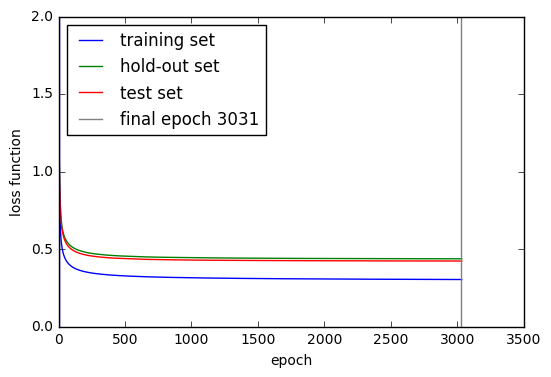

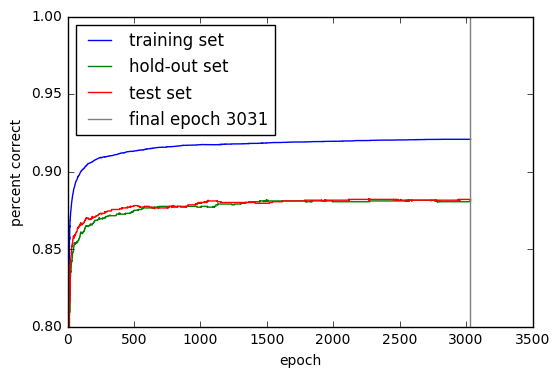

In [2]:
%%time
results = experiment()